# Loading Libraries and Initialize

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

# Reading data from CSV file and filtering Apple stock price 

In [2]:
allData = pd.read_csv('Data//all_stocks_5yr.csv', index_col=['date'], parse_dates=['date'])
df = allData[allData['Name'] == 'AAPL']

# Simple Exponential Smoothing (SES)
<img src="images/ses.png">
- α is smoothing parameter where 0≤ α ≤1
- SES is useful to understand the trend.
- As we can see, 1−α is multiplied by the previous expected value ŷ(x−1) which makes the expression recursive. And this is why this method is called Exponential.

In [3]:
def simple_exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

# Calculating Simple Exponential Smoothing

In [4]:
alpha = 0.05
df['ses'] = simple_exponential_smoothing(df['close'], alpha)
df.tail(10)

,open,high,low,close,volume,Name,ses
date,,,,,,,
2018-01-25,174.505,174.9500,170.5300,171.11,41529004,AAPL,173.383961
2018-01-26,172.000,172.0000,170.0600,171.51,39143011,AAPL,173.290263
2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL,173.023750
2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,172.721062
2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,172.456509
2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,172.222684
2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,171.636549
2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,170.879222
2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,170.486761


# Visualizing All Data

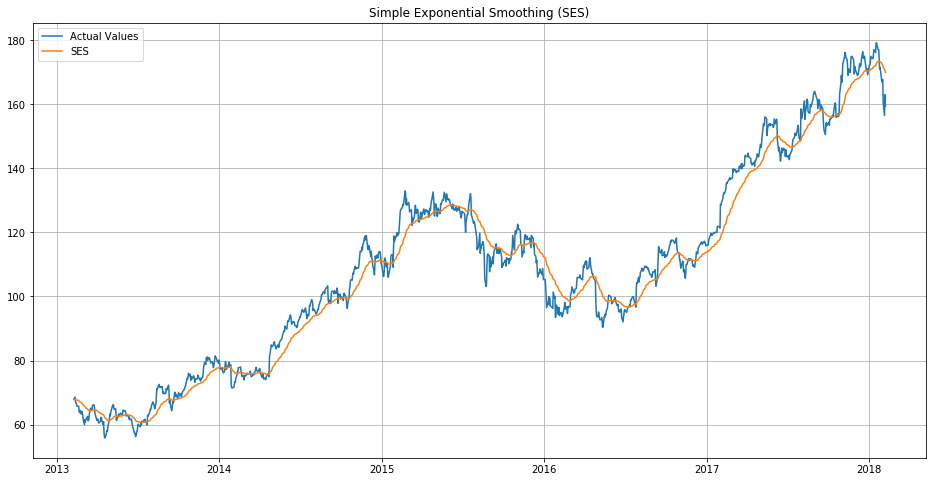

In [5]:
plt.figure(figsize=(16,8))
plt.title('Simple Exponential Smoothing (SES)')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['ses'], label='SES')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualizing Last 200 Days

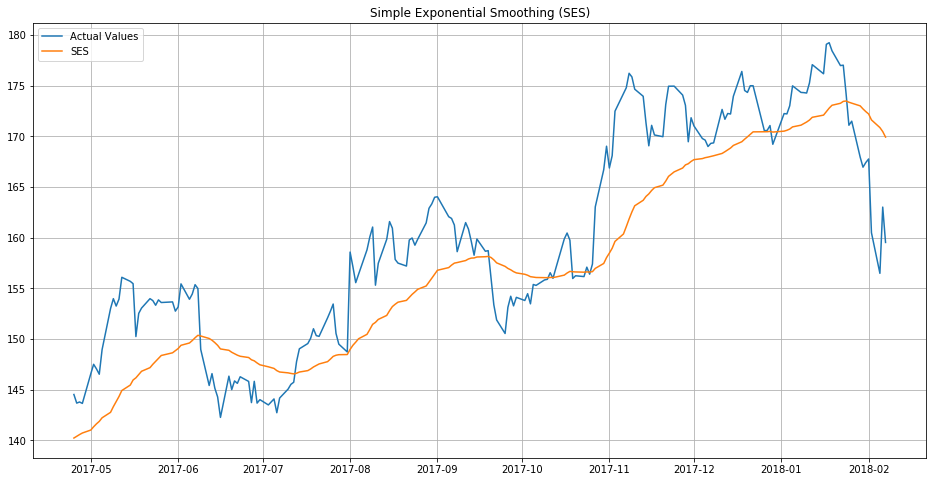

In [6]:
df = df[-200:]

plt.figure(figsize=(16,8))
plt.title('Simple Exponential Smoothing (SES)')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['ses'], label='SES')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()